# Data Cleaning & Preprocessing

## 1️⃣ Load the Dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Business_analyst_job_listings_linkedin.csv")

In [3]:
df.head() # Preview first 5 rows

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,Business Analyst,United States,2024-09-04,Wipro,About the Company:\n\nWipro Limited (NYSE: WIT...,Over 200 applicants,Full-time,Mid-Senior level,Analyst and Health Care Provider,IT Services and IT Consulting
1,"Business Analyst, CS Workforce Management",United States,2024-08-23,Netflix,Netflix is one of the world’s leading entertai...,Over 200 applicants,Full-time,Not Applicable,Other,Entertainment Providers
2,Business Analyst,"Atlanta, GA",2024-08-02,"Donato Technologies, Inc.",Required Fields\n\n\n * Number of Positions re...,170 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",IT Services and IT Consulting
3,Business Analyst,"Miami, FL",2024-08-20,Carnival Cruise Line,"Job ID 7930 Location Miami, FL Date posted 07/...",Over 200 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",Travel Arrangements
4,Business Analyst,"New York, NY",2024-08-27,"Relevante, Inc.","Salary: $ 130,000.00\n\nWe have partnered with...",Over 200 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",Banking


## 2️⃣ Initial Data Exploration

In [12]:
# Dataset Overview 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              921 non-null    object
 1   location           921 non-null    object
 2   publishedAt        921 non-null    object
 3   companyName        911 non-null    object
 4   description        921 non-null    object
 5   applicationsCount  921 non-null    object
 6   contractType       921 non-null    object
 7   experienceLevel    921 non-null    object
 8   workType           921 non-null    object
 9   sector             921 non-null    object
dtypes: object(10)
memory usage: 72.1+ KB


In [13]:
# Summary Statistics 

df.describe()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
count,921,921,921,911,921,921,921,921,921,921
unique,239,250,165,387,841,157,4,7,83,149
top,Business Analyst,United States,2024-08-15,CGS Federal (Contact Government Services),"Employment Type: Full-Time, Experienced\n\nDep...",Over 200 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",IT Services and IT Consulting
freq,523,159,60,54,54,403,501,437,605,284


In [14]:
# Column Names 

df.columns

Index(['title', 'location', 'publishedAt', 'companyName', 'description',
       'applicationsCount', 'contractType', 'experienceLevel', 'workType',
       'sector'],
      dtype='object')

## 3️⃣ Handling Missing Values

In [15]:
df.isnull().sum()

title                 0
location              0
publishedAt           0
companyName          10
description           0
applicationsCount     0
contractType          0
experienceLevel       0
workType              0
sector                0
dtype: int64

### Handling Missing Values in `companyName`

In [4]:
# Fill missing values in the 'companyName' column with 'Unknown'

df['companyName'].fillna('Unknown', inplace=True) 

# Check for any missing values in the entire DataFrame
df.isnull().sum()


title                0
location             0
publishedAt          0
companyName          0
description          0
applicationsCount    0
contractType         0
experienceLevel      0
workType             0
sector               0
dtype: int64

## 4️⃣ Removing Duplicates


In [11]:
df.drop_duplicates(inplace=True)

### 📌 Clean & Extract Numeric Values from 'applicationsCount'

In [6]:
# Clean the 'applicationsCount' column by extracting numeric part
df['applicationsCount'] = df['applicationsCount'].astype(str).str.extract('(\d+)')
df['applicationsCount'] = df['applicationsCount'].astype(float)

## 5️⃣ Outlier Detection & Treatment

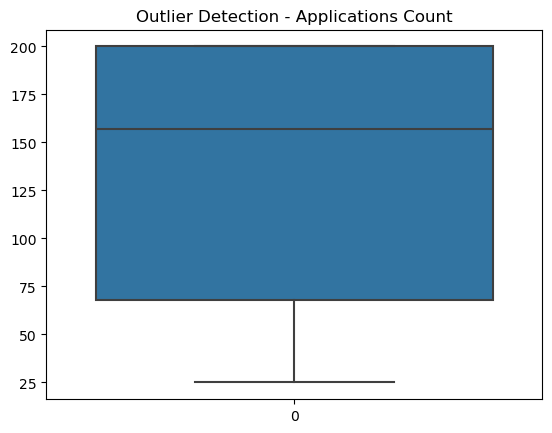

In [7]:
# Visualize with boxplot

sns.boxplot(df['applicationsCount'])
plt.title('Outlier Detection - Applications Count')
plt.show()

In [29]:
# Calculate IQR

Q1 = df['applicationsCount'].quantile(0.25)
Q3 = df['applicationsCount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['applicationsCount'] >= lower_bound) & (df['applicationsCount'] <= upper_bound)]

## 6️⃣ Data Standardization (Formatting, Text Cleaning)

In [17]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

In [18]:
df['applicationsCount'] = df['applicationsCount'].str.extract('(\d+)').astype(float)

In [27]:
df['publishYear'] = df['publishedAt'].dt.year
df['publishMonth'] = df['publishedAt'].dt.month

In [9]:
df['description'] = df['description'].str.replace('\n', ' ', regex=True).str.strip()

## 7️⃣ Final Cleaned Dataset


In [28]:
df.to_csv("cleaned_business_analyst_listings.csv", index=False)

## ✅ Summary of Cleaning Steps

### - Handled missing values in 'companyName'
#### - Removed duplicate rows
#### - Converted 'publishedAt' to datetime
#### - Extracted numeric value from 'applicationsCount'
#### - Detected and removed outliers using IQR
#### - Standardized formatting and cleaned text
#### - Added 'publishYear' and 'publishMonth'
#### - Exported the cleaned data to a new CSV